<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/tf_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tf_keras
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-07 07:59:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-07 07:59:55 (33.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback,plot_loss_curves, unzip_data,walk_through_dir

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-01-07 07:59:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.251.188.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   184MB/s    in 0.9s    

2025-01-07 07:59:58 (184 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [7]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '/content/10_food_classe

In [8]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [9]:
IMG_SIZE = (224,224)

In [10]:
train_data_10perc =tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    seed=42
)

test_data_10perc = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
train_data_10perc.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for img, label in train_data_10perc.take(1):
  print(img, label)

tf.Tensor(
[[[[1.10000000e+02 6.32397957e+01 0.00000000e+00]
   [1.18780609e+02 7.49744949e+01 7.37755108e+00]
   [1.06168365e+02 6.54438782e+01 1.02551079e+00]
   ...
   [9.51429443e+01 5.70000000e+01 2.21426392e+00]
   [1.04714348e+02 6.15000267e+01 8.57146740e+00]
   [1.10357109e+02 6.33571091e+01 9.35710812e+00]]

  [[1.14693878e+02 7.08877563e+01 4.36224604e+00]
   [1.14423470e+02 7.30051041e+01 7.14285660e+00]
   [1.10346939e+02 7.12346954e+01 6.29081631e+00]
   ...
   [9.44694366e+01 5.59285736e+01 1.34179497e+00]
   [1.00285751e+02 5.70714264e+01 4.14286995e+00]
   [1.07311264e+02 5.74490089e+01 4.40309334e+00]]

  [[1.07239792e+02 6.82346954e+01 7.65306503e-02]
   [1.13382652e+02 7.48112259e+01 7.59694004e+00]
   [1.13469383e+02 7.48520432e+01 9.94387722e+00]
   ...
   [9.81888351e+01 5.96173630e+01 5.04589176e+00]
   [1.02857155e+02 5.68571548e+01 4.85715580e+00]
   [1.09576607e+02 5.95766068e+01 6.57660770e+00]]

  ...

  [[9.08060455e+01 6.93775177e+01 2.37751961e+00]
   [9

## Model 1

In [13]:
dir_name = "exp"

In [14]:
base_model =tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')

# for resnet50v2
#x = tf_keras.layers.Rescaling(1./255)(inputs)

x = base_model(inputs)

print(f"Shape after base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after Global Average Pooling: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

Shape after base model: (None, 7, 7, 1280)
Shape after Global Average Pooling: (None, 1280)


In [16]:
base_hist = model_1.fit(train_data_10perc,
                        epochs = 5,
                        validation_data =test_data_10perc,
                        callbacks =[create_tensorboard_callback("exp", "base")])

Saving TensorBoard log files to: exp/base/20250107-080008
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.2235 - loss: 2.1336 - val_accuracy: 0.6500 - val_loss: 1.3914
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 340ms/step - accuracy: 0.7025 - loss: 1.2603 - val_accuracy: 0.7704 - val_loss: 0.9818
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 548ms/step - accuracy: 0.7797 - loss: 0.9163 - val_accuracy: 0.8056 - val_loss: 0.8000
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 503ms/step - accuracy: 0.8359 - loss: 0.7238 - val_accuracy: 0.8196 - val_loss: 0.7055
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.8629 - loss: 0.6141 - val_accuracy: 0.8256 - val_loss: 0.6517


In [17]:
model_1.evaluate(test_data_10perc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8074 - loss: 0.6896


[0.6517479419708252, 0.8256000280380249]

In [18]:
df = pd.DataFrame(base_hist.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.344000,1.940455,0.6500,1.391356
1,0.718667,1.192848,0.7704,0.981826
2,0.782667,0.885681,0.8056,0.799984
3,0.822667,0.721355,0.8196,0.705485
4,0.862667,0.623011,0.8256,0.651748


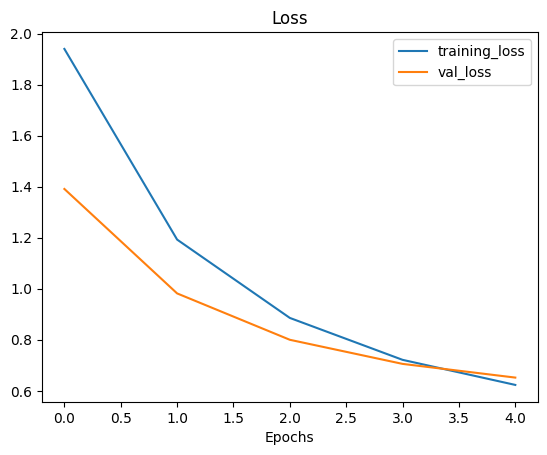

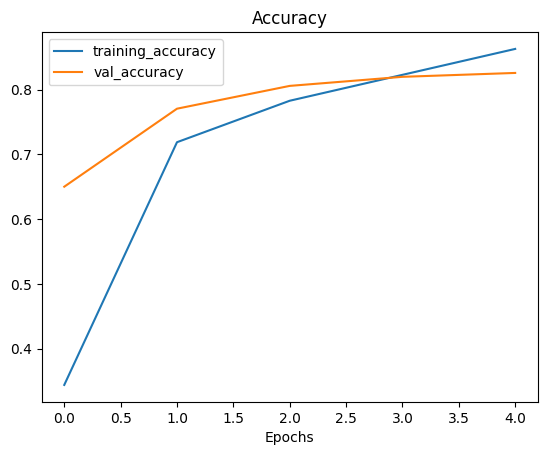

In [19]:
plot_loss_curves(base_hist)

In [20]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

## Model 2 (1% perc data)

In [21]:
# loading in 1 perc data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-01-07 08:02:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.251.188.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   257MB/s    in 0.5s    

2025-01-07 08:02:44 (257 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
unzip_data("/content/10_food_classes_1_percent.zip")

In [23]:
train_dir_1_perc = "10_food_classes_1_percent/train"
test_dir_1_perc = "10_food_classes_1_percent/test"

In [24]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [25]:
train_data_1_perc = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir_1_perc,
    image_size=IMG_SIZE,
    label_mode="categorical",
    seed=42,
    shuffle = True,
    batch_size = 32
)

test_data_1_perc = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir_1_perc,
    image_size=IMG_SIZE,
    label_mode="categorical",
    seed=42,
    shuffle = False,
    batch_size = 32
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation

In [36]:
data_augment = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
], name = "data_augment")

## Visualising augemented images

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

array([[[ 21,  28,  38],
        [ 22,  29,  39],
        [ 21,  28,  38],
        ...,
        [ 71,  74,  57],
        [ 70,  73,  56],
        [ 69,  72,  55]],

       [[ 21,  28,  38],
        [ 21,  28,  38],
        [ 22,  29,  39],
        ...,
        [ 83,  86,  69],
        [ 82,  85,  68],
        [ 81,  84,  67]],

       [[ 22,  29,  39],
        [ 22,  29,  39],
        [ 22,  29,  39],
        ...,
        [ 84,  87,  70],
        [ 80,  83,  66],
        [ 76,  79,  62]],

       ...,

       [[248, 254, 250],
        [248, 254, 250],
        [248, 254, 250],
        ...,
        [158, 155, 122],
        [156, 156, 122],
        [156, 156, 122]],

       [[246, 255, 250],
        [246, 255, 250],
        [248, 254, 250],
        ...,
        [158, 155, 122],
        [153, 153, 119],
        [152, 152, 118]],

       [[246, 255, 250],
        [246, 255, 250],
        [248, 254, 250],
        ...,
        [159, 156, 123],
        [153, 153, 119],
        [150, 150, 116]]], dtype=uint8)
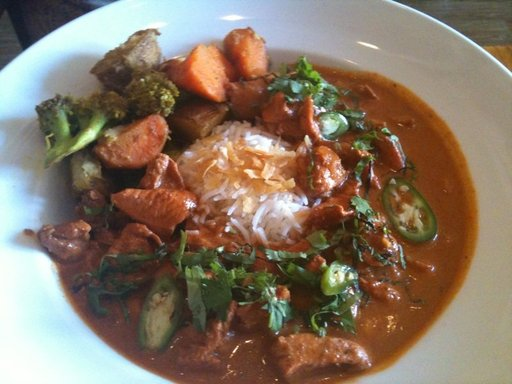

In [28]:
img = mpimg.imread("10_food_classes_1_percent/test/chicken_curry/101833.jpg")
img

In [29]:
augmented = data_augment(tf.expand_dims(tf.constant(img), axis = 0))

(-0.5, 511.5, 457.5, -0.5)

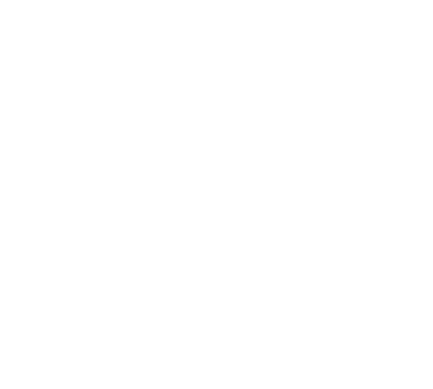

In [30]:
plt.imshow(augmented[0])
plt.axis("off")

In [37]:
base = tf.keras.applications.EfficientNetB0(include_top = False)
base.trainable = False

input = tf.keras.layers.Input(shape = (224,224,3), name = "input_layer")

x = data_augment(input)

x = base(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)

output = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_2 = tf.keras.Model(input, output)

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [38]:
aug_hist_1_perc = model_2.fit(train_data_1_perc,
                              epochs = 5,
                              validation_data = test_data_1_perc,
                              callbacks=[create_tensorboard_callback("exp", "augmented_1_perc")])

Saving TensorBoard log files to: exp/augmented_1_perc/20250107-080354
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.1385 - loss: 2.3346 - val_accuracy: 0.1948 - val_loss: 2.1916
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.3173 - loss: 2.1012 - val_accuracy: 0.2792 - val_loss: 2.0885
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.3725 - loss: 1.9616 - val_accuracy: 0.3328 - val_loss: 1.9987
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5110 - loss: 1.8122 - val_accuracy: 0.3856 - val_loss: 1.9153
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5709 - loss: 1.6777 - val_accuracy: 0.4284 - val_loss: 1.8400


In [39]:
model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augment (Sequential)            │ (None, None, 224, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, 7, 1280)       │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling               │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

## Model 3 with data augment and 10 perc data

In [40]:
tf.random.set_seed(42)

base = tf.keras.applications.EfficientNetB0(include_top = False)
base.trainable = False

input = tf.keras.layers.Input(shape = (224,224,3), name = "input_layer")

x = data_augment(input)

x = base(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)

output = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_3 = tf.keras.Model(input,output)

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [41]:
aug_hist_10_perc = model_3.fit(train_data_10perc,
            epochs = 5,
            validation_data = test_data_10perc,
            callbacks = [create_tensorboard_callback("exp", "augmented_10_perc")])

Saving TensorBoard log files to: exp/augmented_10_perc/20250107-080524
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 665ms/step - accuracy: 0.1966 - loss: 2.2218 - val_accuracy: 0.5996 - val_loss: 1.5772
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.6032 - loss: 1.5367 - val_accuracy: 0.7192 - val_loss: 1.1525
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 562ms/step - accuracy: 0.6805 - loss: 1.2286 - val_accuracy: 0.7644 - val_loss: 0.9526
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 376ms/step - accuracy: 0.7391 - loss: 1.0190 - val_accuracy: 0.7880 - val_loss: 0.8275
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.7651 - loss: 0.9126 - val_accuracy: 0.7928 - val_loss: 0.7617


## Creating model checkpoint

In [42]:
checkpoint_path = "ten%_model_check/checkpoint.weights.h5"

In [44]:
check_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                    save_weights_only = True,
                                                    save_best_only = False,
                                                    save_freq ="epoch",
                                                    verbose =1)

In [45]:
model_check_test = model_3.fit(train_data_10perc,
            epochs = 5,
            validation_data = test_data_10perc,
            callbacks = [create_tensorboard_callback("exp", "augmented_10_perc"),
                         check_callback])

Saving TensorBoard log files to: exp/augmented_10_perc/20250107-080745
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7606 - loss: 0.8541
Epoch 1: saving model to ten%_model_check/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.7615 - loss: 0.8526 - val_accuracy: 0.8072 - val_loss: 0.7124
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8032 - loss: 0.7594
Epoch 2: saving model to ten%_model_check/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 544ms/step - accuracy: 0.8029 - loss: 0.7591 - val_accuracy: 0.8112 - val_loss: 0.6750
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7907 - loss: 0.7590
Epoch 3: saving model to ten%_model_check/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 546ms/step - accuracy: 0.7912 - loss: 0.7579 - val_accuracy: 0.8148 - val_loss: 0.6591
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7931 - loss: 0.7358
Epoch 4: saving model to ten%_model_check/check

## Loading in weights

In [46]:
model_3.load_weights(checkpoint_path)

In [47]:
model_3.evaluate(test_data_10perc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.8089 - loss: 0.6560


[0.6146811246871948, 0.8220000267028809]

### model 4 using fine tuning

In [48]:
model_3.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augment, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling, built=True>,
 <Dense name=output_layer, built=True>]

In [51]:
for layers in model_3.layers:
  print(layers, layers.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augment, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling, built=True> True
<Dense name=output_layer, built=True> True


### printing effnet b0 layers

In [54]:
for i,layers in enumerate(model_3.layers[2].layers):
  print(i, layers, layers.trainable)

0 <InputLayer name=input_layer_6, built=True> False
1 <Rescaling name=rescaling_8, built=True> False
2 <Normalization name=normalization_4, built=True> False
3 <Rescaling name=rescaling_9, built=True> False
4 <ZeroPadding2D name=stem_conv_pad, built=True> False
5 <Conv2D name=stem_conv, built=True> False
6 <BatchNormalization name=stem_bn, built=True> False
7 <Activation name=stem_activation, built=True> False
8 <DepthwiseConv2D name=block1a_dwconv, built=True> False
9 <BatchNormalization name=block1a_bn, built=True> False
10 <Activation name=block1a_activation, built=True> False
11 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True> False
12 <Reshape name=block1a_se_reshape, built=True> False
13 <Conv2D name=block1a_se_reduce, built=True> False
14 <Conv2D name=block1a_se_expand, built=True> False
15 <Multiply name=block1a_se_excite, built=True> False
16 <Conv2D name=block1a_project_conv, built=True> False
17 <BatchNormalization name=block1a_project_bn, built=True> False
18 <C

In [56]:
## make last 10 layers trainable
base.trainable = False

for layer in base.layers[227:]:
  layer.trainable = True

In [58]:
#Recompile model 3

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001), # lower lr when using fine tuning
                metrics = [["accuracy"]])

## Check which layer is trainable

In [59]:
for i, layers in enumerate(model_3.layers[2].layers):
  print(i, layers, layers.trainable)

0 <InputLayer name=input_layer_6, built=True> False
1 <Rescaling name=rescaling_8, built=True> False
2 <Normalization name=normalization_4, built=True> False
3 <Rescaling name=rescaling_9, built=True> False
4 <ZeroPadding2D name=stem_conv_pad, built=True> False
5 <Conv2D name=stem_conv, built=True> False
6 <BatchNormalization name=stem_bn, built=True> False
7 <Activation name=stem_activation, built=True> False
8 <DepthwiseConv2D name=block1a_dwconv, built=True> False
9 <BatchNormalization name=block1a_bn, built=True> False
10 <Activation name=block1a_activation, built=True> False
11 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True> False
12 <Reshape name=block1a_se_reshape, built=True> False
13 <Conv2D name=block1a_se_reduce, built=True> False
14 <Conv2D name=block1a_se_expand, built=True> False
15 <Multiply name=block1a_se_excite, built=True> False
16 <Conv2D name=block1a_project_conv, built=True> False
17 <BatchNormalization name=block1a_project_bn, built=True> False
18 <C

In [60]:
model_3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augment (Sequential)            │ (None, None, 224, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, 7, 1280)       │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling               │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 906,042 (3.46 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

In [ ]:
hist_fine_aug_10_perc = model_3.fit(train_data_10perc,
                                    )